In [32]:
# Autoreload all modules
%load_ext autoreload
%autoreload 2

import numpy as np
import jax
import jax.numpy as jnp
import jax.random as jr
import pylab as plt

# add ../mcjax to the path
import sys
sys.path.append('../../')

from mcjax.proba.banana2d import Banana2D
from mcjax.util.plot_2d import evaluate_on_grid_2d


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
# initialize jax RNG
key = jr.key(0)

In [36]:
# create the Banana2D distribution
dist = Banana2D.create()
params = dist.init_params(noise_std=0.2)
logdensity = dist.log_prob_only(params=params)
logdensity_batch = jax.jit(jax.vmap(logdensity, in_axes=(0,)))

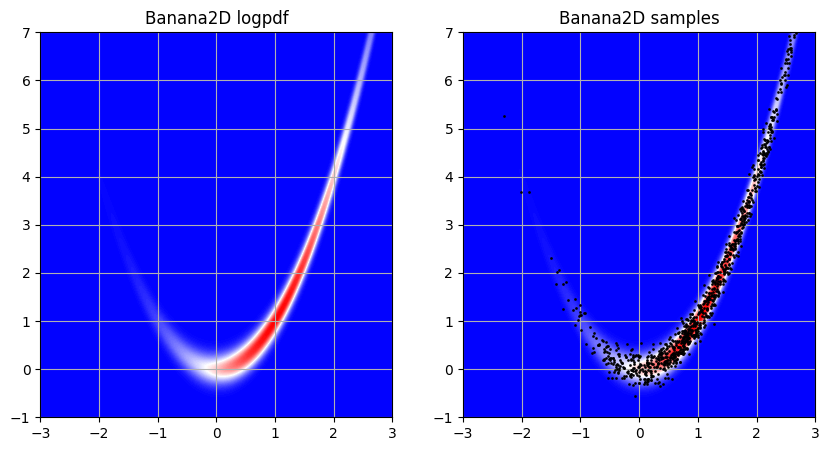

In [37]:
xmin, xmax = -3, 3
ymin, ymax = -1, 7
X, Y, Z = evaluate_on_grid_2d(
    func_batch=logdensity_batch,
    xlim=(xmin, xmax),
    ylim=(ymin, ymax),
    Nx=500,
    Ny=500
)

plt.figure(figsize=(10, 5))

# plot the logpdf
plt.subplot(1, 2, 1)
plt.contourf(X, Y, jnp.exp(Z), 100, cmap='bwr', origin='lower')
plt.title("Banana2D logpdf")
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.grid()


# sample from the distribution
n_samples = 1_000
samples = dist.sample(params=params, key=key, n_samples=n_samples)

# scatter plot of the samples
plt.subplot(1, 2, 2)
plt.contourf(X, Y, jnp.exp(Z), 100, cmap='bwr', origin='lower')
plt.scatter(samples[:, 0], samples[:, 1], s=1, color="black", zorder=10, alpha=0.9)
plt.title("Banana2D samples")
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.grid()
